In [1]:
import pennylane as qml
from pennylane import numpy as np
from matplotlib import pyplot as plt
import time
from supplementary_code import *

In [2]:
nq = 10
depth = int(nq/2)
dev = qml.device("default.qubit", wires= nq) 

In [3]:
nq

10

In [4]:
Delta = 0.7
H = H_XXZ(Delta,wires=range(nq))

print(H)

  (0.7) [Z0 Z1]
+ (0.7) [Z1 Z2]
+ (0.7) [Z2 Z3]
+ (0.7) [Z3 Z4]
+ (0.7) [Z4 Z5]
+ (0.7) [Z5 Z6]
+ (0.7) [Z6 Z7]
+ (0.7) [Z7 Z8]
+ (0.7) [Z8 Z9]
+ (0.7) [Z9 Z0]
+ (1) [X0 X1]
+ (1) [Y0 Y1]
+ (1) [X1 X2]
+ (1) [Y1 Y2]
+ (1) [X2 X3]
+ (1) [Y2 Y3]
+ (1) [X3 X4]
+ (1) [Y3 Y4]
+ (1) [X4 X5]
+ (1) [Y4 Y5]
+ (1) [X5 X6]
+ (1) [Y5 Y6]
+ (1) [X6 X7]
+ (1) [Y6 Y7]
+ (1) [X7 X8]
+ (1) [Y7 Y8]
+ (1) [X8 X9]
+ (1) [Y8 Y9]
+ (1) [X9 X0]
+ (1) [Y9 Y0]


In [5]:
params = np.array([np.pi for _ in range(4*depth)])

In [6]:
@qml.qnode(dev)
def circuit(params, Delta, depth=depth, nq=nq):
    
    HVA_ansatz(params, Delta, depth, range(nq))
    
    return qml.expval(H)

In [7]:
cost_fn = lambda w: circuit(w, Delta=Delta, depth=depth, nq=nq)

In [8]:
start_time = time.time()    

steps = 200

optimizer = qml.AdamOptimizer(stepsize=0.5)
best_cost = cost_fn(params)
best_params = params

for j in range(steps+1):
    params2 = params
    params, cost = optimizer.step_and_cost(cost_fn, params)

    if cost < best_cost:
        best_params = params2
        best_cost = cost
        
    if j!=0 and j % 2 == 0:
        print(f"Cost at Step {j}: {cost}")

end_time = time.time()
print('Time taken: ', (end_time-start_time)/60, ' mins.')

Cost at Step 2: -3.543627701344599
Cost at Step 4: -1.0021983154393228
Cost at Step 6: -4.0090171922137365
Cost at Step 8: -4.317614342713901
Cost at Step 10: -5.806363101157337
Cost at Step 12: -8.294235677563224
Cost at Step 14: -9.090179426954425
Cost at Step 16: -10.65163629318997
Cost at Step 18: -11.432244104002262
Cost at Step 20: -10.735510729636704
Cost at Step 22: -12.004260188775248
Cost at Step 24: -12.83177467390443
Cost at Step 26: -12.448988235505974
Cost at Step 28: -13.477228696069032
Cost at Step 30: -13.606859562499729
Cost at Step 32: -13.858093201957312
Cost at Step 34: -13.867990420586919
Cost at Step 36: -14.243024378637932
Cost at Step 38: -14.198717633265296
Cost at Step 40: -14.551891110560646
Cost at Step 42: -14.803484776365577
Cost at Step 44: -15.256355693355165
Cost at Step 46: -15.449261732799826
Cost at Step 48: -15.730331886915716
Cost at Step 50: -15.781265163309154
Cost at Step 52: -13.42026114899718
Cost at Step 54: -15.746559225765939
Cost at Step 

In [9]:
print(best_cost)

-16.167594210418454


In [10]:
print(cost_fn(best_params))

-16.167594210418454


In [11]:
print(np.array(best_params))

[ 0.6158841   5.92281479  1.53566286  0.818563    5.47099901 -0.62041818
  2.95191339  3.8908598   5.3363409   4.94064203  4.83404279  5.85391047
  4.38235732  3.56972464  4.34719525  0.40780972 -0.08443284  1.48799966
  0.79223661  6.63446835]


In [12]:
for i in range(1,10):
    
    corr = corr_function(i, best_params,0.5,depth,nq)
    
    print(i,np.abs(corr))

1 0.29670281316992353
2 0.14957026652887612
3 0.007455991923040195
4 0.06561718219574908
5 0.14056345510730953
6 0.06561718219574886
7 0.14907786913882573
8 0.14957026652887592
9 0.024175026788348236


In [13]:
# Time evolution

corr_t = []
t = []
i =  3
dt = 1/400

start_time = time.time()    
for step in range(401):
    
    t.append(dt*step)
    
    corr_dt = corr_function(i, best_params, Delta, depth, nq, perturbation='state',timesteps=step)
    
    print(step,corr_dt)
    corr_t.append(corr_dt)
    
end_time = time.time()
print('Time taken: ', (end_time-start_time)/60, ' mins.')

0 -0.2910007446823461
1 -0.29084971138308835
2 -0.2906847168474092
3 -0.29050574775526516
4 -0.2903127934895269
5 -0.2901058461491829
6 -0.2898849005617927
7 -0.2896499542951837
8 -0.2894010076683807
9 -0.2891380637617735
10 -0.2888611284265049
11 -0.28857021029308283
12 -0.2882653207792084
13 -0.2879464740968138
14 -0.2876136872583119
15 -0.2872669800820449
16 -0.28690637519693707
17 -0.28653189804634105
18 -0.2861435768910803
19 -0.2857414428116797
20 -0.28532552970978575
21 -0.2848958743087717
22 -0.2844525161535277
23 -0.2839954976094312
24 -0.2835248638604996
25 -0.2830406629067218
26 -0.28254294556056575
27 -0.2820317654426679
28 -0.2815071789766971
29 -0.28096924538339824
30 -0.28041802667381194
31 -0.27985358764167023
32 -0.2792759958549788
33 -0.27868532164676996
34 -0.27808163810504505
35 -0.2774650210618936
36 -0.27683554908180247
37 -0.2761933034491495
38 -0.27553836815488797
39 -0.27487082988242273
40 -0.2741907779926838
41 -0.2734983045083964
42 -0.2727935040975552
43 -0.

336 -0.11508223747494656
337 -0.1154109999029986
338 -0.11573832562056083
339 -0.11606409704818144
340 -0.1163881979459179
341 -0.11671051344040848
342 -0.11703093005142423
343 -0.11734933571788539
344 -0.11766561982334281
345 -0.11797967322091693
346 -0.11829138825768781
347 -0.11860065879853343
348 -0.11890738024940822
349 -0.11921144958006155
350 -0.11951276534618532
351 -0.11981122771099331
352 -0.12010673846622325
353 -0.12039920105255827
354 -0.12068852057946675
355 -0.12097460384445455
356 -0.12125735935172527
357 -0.1215366973302506
358 -0.12181252975124099
359 -0.12208477034501852
360 -0.12235333461728881
361 -0.12261813986480882
362 -0.12287910519044776
363 -0.12313615151764135
364 -0.1233892016042363
365 -0.12363818005572397
366 -0.12388301333786109
367 -0.12412362978867789
368 -0.12435995962987204
369 -0.12459193497758803
370 -0.12481948985258054
371 -0.12504256018976204
372 -0.125261083847137
373 -0.12547500061411881
374 -0.12568425221923116
375 -0.12588878233719714
376 -0

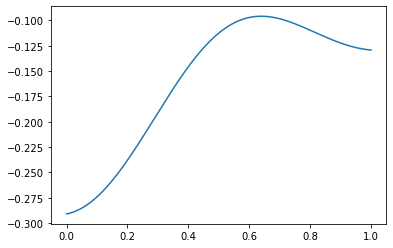

In [15]:
plt.plot(np.linspace(0,1,401),np.real(corr_t))

In [16]:
np.array(corr_t)

tensor([-0.29100074, -0.29084971, -0.29068472, -0.29050575, -0.29031279,
        -0.29010585, -0.2898849 , -0.28964995, -0.28940101, -0.28913806,
        -0.28886113, -0.28857021, -0.28826532, -0.28794647, -0.28761369,
        -0.28726698, -0.28690638, -0.2865319 , -0.28614358, -0.28574144,
        -0.28532553, -0.28489587, -0.28445252, -0.2839955 , -0.28352486,
        -0.28304066, -0.28254295, -0.28203177, -0.28150718, -0.28096925,
        -0.28041803, -0.27985359, -0.279276  , -0.27868532, -0.27808164,
        -0.27746502, -0.27683555, -0.2761933 , -0.27553837, -0.27487083,
        -0.27419078, -0.2734983 , -0.2727935 , -0.27207647, -0.27134731,
        -0.27060613, -0.26985302, -0.26908809, -0.26831147, -0.26752325,
        -0.26672355, -0.26591249, -0.2650902 , -0.26425679, -0.26341239,
        -0.26255712, -0.26169112, -0.26081451, -0.25992744, -0.25903003,
        -0.25812243, -0.25720478, -0.25627721, -0.25533988, -0.25439294,
        -0.25343652, -0.25247078, -0.25149588, -0.2